In [18]:
from tensorflow import keras
import tensorflow as tf
import tensorflow_probability as tfp
import pandas as pd
import numpy as np
import seaborn as sns
import importlib

In [4]:
import data
import data_config
import preprocess_ccle_gdsc_utils
import preprocess_xena_utils

In [16]:
data_provider = data.DataProvider(feature_filter_fn=preprocess_xena_utils.filter_with_MAD, feature_number=10000, 
                                  omics=['gex','mut'], scale_fn=data.min_max_scale)

Preprocessed data has 1019 samples and 49376 features
Aligned dataframes have 18242 features in common


/Users/hedi/PycharmProjects/CLRN/data.py:76: DtypeWarning: Columns (3,25,26,27,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  self.labeled_data, self.unlabeled_data = self._load_data()


Preprocessed data has 1570 samples and 18495 features
Propagation Start!
Aligned dataframes have 19344 features in common
Aligned dataframes have 10000 features in common
Aligned dataframes have 10000 features in common


In [101]:
mut_prediction_df[drug][y.index][test_index] 

BXPC3      -1.0
SAOS2      -1.0
OCILY19    -1.0
SW1088     -1.0
ISTMES1    -1.0
           ... 
IALM       -1.0
COLO829    -1.0
YAPC       -1.0
NCIH1838   -1.0
HS939T     -1.0
Name: rTRAIL, Length: 114, dtype: float64

In [106]:
mut_prediction_df.loc[y.index[test_index], drug] 

BXPC3       0.750058
SAOS2       0.944406
OCILY19     0.944406
SW1088      0.927531
ISTMES1     0.944406
              ...   
IALM        0.915371
COLO829     0.856542
YAPC        0.944406
NCIH1838    0.944810
HS939T      0.900328
Name: rTRAIL, Length: 114, dtype: float64

In [17]:
data_provider.shape_dict

{'gex': 10000, 'mut': 10000, 'target': 449}

In [80]:
from module import AE, VAE

In [81]:
import module

In [82]:
tf.keras.backend.clear_session()
batch_size = 64
train_dataset = tf.data.Dataset.from_tensor_slices((data_provider.unlabeled_data['gex'].values, data_provider.unlabeled_data['gex'].values))
val_dataset = tf.data.Dataset.from_tensor_slices((data_provider.labeled_data['gex'].values, data_provider.labeled_data['gex'].values))


In [83]:
gex_auto_encoder = AE(latent_dim=128, 
                      output_dim=data_provider.shape_dict['gex'], 
                      architecture=[1024, 512, 256], 
                      noise_fn=keras.layers.GaussianNoise, 
                      output_act_fn=keras.activations.sigmoid)

In [85]:
importlib.reload(train)
import train

In [87]:
encoder, history_df = train.pre_train_gex_AE(auto_encoder=gex_auto_encoder,train_dataset=train_dataset, val_dataset=val_dataset)

1024_512_256_128_encoder_weights exists!
epoch:  0

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Training loss (for one batch) at step 10: 5.806647777557373
Seen so far: 640 samples
Training loss (for one batch) at step 20: 4.665765762329102
Seen so far: 1280 samples
Training loss (for one batch) at step 30: 3.849574089050293
Seen so far: 1920 samples
Training loss (for one batch) at step 40: 3.2533843517303467
Seen so far: 2560 samples
Training loss (for one batch) at step 50: 2.798151969909668
Seen so far: 3200 samples
Training loss (for one batc

Training loss (for one batch) at step 50: 0.017275240272283554
Seen so far: 3200 samples
Training loss (for one batch) at step 60: 0.016539346426725388
Seen so far: 3840 samples
Training loss (for one batch) at step 70: 0.016696345061063766
Seen so far: 4480 samples
Training loss (for one batch) at step 80: 0.01728452369570732
Seen so far: 5120 samples
Training loss (for one batch) at step 90: 0.017064176499843597
Seen so far: 5760 samples
Training loss (for one batch) at step 100: 0.017030224204063416
Seen so far: 6400 samples
Training loss (for one batch) at step 110: 0.01676049269735813
Seen so far: 7040 samples
Training loss (for one batch) at step 120: 0.017255377024412155
Seen so far: 7680 samples
Training loss (for one batch) at step 130: 0.016819508746266365
Seen so far: 8320 samples
Training loss (for one batch) at step 140: 0.019369790330529213
Seen so far: 8960 samples
Training loss (for one batch) at step 150: 0.020856596529483795
Seen so far: 9600 samples
Training loss (fo

epoch:  11
Training loss (for one batch) at step 10: 0.02060653269290924
Seen so far: 640 samples
Training loss (for one batch) at step 20: 0.018035566434264183
Seen so far: 1280 samples
Training loss (for one batch) at step 30: 0.017215948551893234
Seen so far: 1920 samples
Training loss (for one batch) at step 40: 0.01618882082402706
Seen so far: 2560 samples
Training loss (for one batch) at step 50: 0.01607896387577057
Seen so far: 3200 samples
Training loss (for one batch) at step 60: 0.019228998571634293
Seen so far: 3840 samples
Training loss (for one batch) at step 70: 0.017034567892551422
Seen so far: 4480 samples
Training loss (for one batch) at step 80: 0.015412875451147556
Seen so far: 5120 samples
Training loss (for one batch) at step 90: 0.01778307370841503
Seen so far: 5760 samples
Training loss (for one batch) at step 100: 0.018336337059736252
Seen so far: 6400 samples
Training loss (for one batch) at step 110: 0.016406595706939697
Seen so far: 7040 samples
Training loss

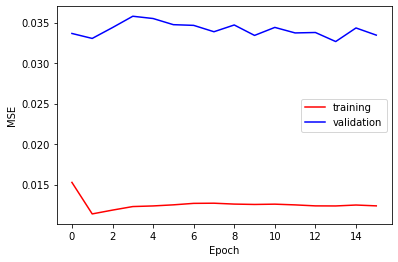

In [89]:
import utils
utils.plot_learning_curve(history_df['train_mse'], history_df['val_mse'], metric_name='MSE')

In [90]:
import importlib
importlib.reload(module)
importlib.reload(loss)
from loss import pearson_correlation, penalized_mean_squared_error, spearman_correlation
from utils import *

In [91]:
from collections import defaultdict
from sklearn.model_selection import KFold


In [93]:
best_epoch_per_drug, training_history, validation_history = fine_tune_gex_autoencoder(
    gex_auto_encoder.encoder, 
    target_df = data_provider.labeled_data['target'],
    raw_X = data_provider.labeled_data['gex'])

1024_512_256_128_encoder_weights exists!
Training loss (for (5Z)-7-Oxozeaenol) at epoch 1: 0.03402450680732727
Training loss (for 5-Fluorouracil) at epoch 1: 0.02340473234653473
Training loss (for A-443654) at epoch 1: 0.03229735046625137
Training loss (for A-770041) at epoch 1: 0.036042749881744385
Training loss (for A-83-01) at epoch 1: 0.019092686474323273
Training loss (for ABT737) at epoch 1: 0.02486138790845871
Training loss (for ACY-1215) at epoch 1: 0.028907284140586853
Training loss (for AGI-5198) at epoch 1: 0.01724916696548462
Training loss (for AGI-6780) at epoch 1: 0.023036867380142212
Training loss (for AICA Ribonucleotide) at epoch 1: 0.04920177161693573
Training loss (for (5Z)-7-Oxozeaenol) at epoch 2: 0.030070900917053223
Training loss (for 5-Fluorouracil) at epoch 2: 0.014145761728286743
Training loss (for A-443654) at epoch 2: 0.019152797758579254
Training loss (for A-770041) at epoch 2: 0.020915716886520386
Training loss (for A-83-01) at epoch 2: 0.01078354567289352

Training loss (for AGI-5198) at epoch 13: 0.002595622092485428
Training loss (for AGI-6780) at epoch 13: 0.0017130076885223389
Training loss (for AICA Ribonucleotide) at epoch 13: 0.006103575229644775
Training loss (for (5Z)-7-Oxozeaenol) at epoch 14: 0.01979777216911316
Training loss (for 5-Fluorouracil) at epoch 14: 0.0031528621912002563
Training loss (for A-443654) at epoch 14: 0.004350028932094574
Training loss (for A-770041) at epoch 14: 0.0026994943618774414
Training loss (for A-83-01) at epoch 14: 0.0018685497343540192
Training loss (for ABT737) at epoch 14: 0.00586274266242981
Training loss (for ACY-1215) at epoch 14: 0.007215231657028198
Training loss (for AGI-5198) at epoch 14: 0.002350863069295883
Training loss (for AGI-6780) at epoch 14: 0.0015768706798553467
Training loss (for AICA Ribonucleotide) at epoch 14: 0.005523949861526489
Training loss (for (5Z)-7-Oxozeaenol) at epoch 15: 0.019290298223495483
Training loss (for 5-Fluorouracil) at epoch 15: 0.002877652645111084
Tra

Training loss (for A-443654) at epoch 26: 0.0024385973811149597
Training loss (for A-770041) at epoch 26: 0.0014840662479400635
Training loss (for A-83-01) at epoch 26: 0.0010344497859477997
Training loss (for ABT737) at epoch 26: 0.0028610974550247192
Training loss (for ACY-1215) at epoch 26: 0.0032785534858703613
Training loss (for AGI-5198) at epoch 26: 0.001243777573108673
Training loss (for AGI-6780) at epoch 26: 0.0009285211563110352
Training loss (for AICA Ribonucleotide) at epoch 26: 0.0022486746311187744
Training loss (for (5Z)-7-Oxozeaenol) at epoch 27: 0.013093382120132446
Training loss (for 5-Fluorouracil) at epoch 27: 0.0016133934259414673
Training loss (for A-443654) at epoch 27: 0.002690829336643219
Training loss (for A-770041) at epoch 27: 0.0015060752630233765
Training loss (for A-83-01) at epoch 27: 0.0010429918766021729
Training loss (for ABT737) at epoch 27: 0.0026995092630386353
Training loss (for ACY-1215) at epoch 27: 0.003142431378364563
Training loss (for AGI-5

Training loss (for AGI-5198) at epoch 38: 0.0008134134113788605
Training loss (for AGI-6780) at epoch 38: 0.0006254911422729492
Training loss (for AICA Ribonucleotide) at epoch 38: 0.0012878179550170898
Training loss (for (5Z)-7-Oxozeaenol) at epoch 39: 0.00821918249130249
Training loss (for 5-Fluorouracil) at epoch 39: 0.0008835345506668091
Training loss (for A-443654) at epoch 39: 0.0011813044548034668
Training loss (for A-770041) at epoch 39: 0.0007768124341964722
Training loss (for A-83-01) at epoch 39: 0.0007979311048984528
Training loss (for ABT737) at epoch 39: 0.0017758160829544067
Training loss (for ACY-1215) at epoch 39: 0.0016693472862243652
Training loss (for AGI-5198) at epoch 39: 0.0007348097860813141
Training loss (for AGI-6780) at epoch 39: 0.0005300343036651611
Training loss (for AICA Ribonucleotide) at epoch 39: 0.0013134181499481201
Training loss (for (5Z)-7-Oxozeaenol) at epoch 40: 0.007929414510726929
Training loss (for 5-Fluorouracil) at epoch 40: 0.00097231566905

Training loss (for 5-Fluorouracil) at epoch 51: 0.0007151961326599121
Training loss (for A-443654) at epoch 51: 0.0016015097498893738
Training loss (for A-770041) at epoch 51: 0.0008050203323364258
Training loss (for A-83-01) at epoch 51: 0.000757906585931778
Training loss (for ABT737) at epoch 51: 0.0013921335339546204
Training loss (for ACY-1215) at epoch 51: 0.0011733174324035645
Training loss (for AGI-5198) at epoch 51: 0.0007102563977241516
Training loss (for AGI-6780) at epoch 51: 0.0006154775619506836
Training loss (for AICA Ribonucleotide) at epoch 51: 0.0009899735450744629
Training loss (for (5Z)-7-Oxozeaenol) at epoch 52: 0.005898803472518921
Training loss (for 5-Fluorouracil) at epoch 52: 0.0006622225046157837
Training loss (for A-443654) at epoch 52: 0.001190289855003357
Training loss (for A-770041) at epoch 52: 0.0006054341793060303
Training loss (for A-83-01) at epoch 52: 0.000714179128408432
Training loss (for ABT737) at epoch 52: 0.0012613311409950256
Training loss (for

Training loss (for ABT737) at epoch 63: 0.0010119304060935974
Training loss (for ACY-1215) at epoch 63: 0.0009679943323135376
Training loss (for AGI-5198) at epoch 63: 0.000584915280342102
Training loss (for AGI-6780) at epoch 63: 0.00032335519790649414
Training loss (for AICA Ribonucleotide) at epoch 63: 0.0009316205978393555
Training loss (for (5Z)-7-Oxozeaenol) at epoch 64: 0.004189297556877136
Training loss (for 5-Fluorouracil) at epoch 64: 0.0006371289491653442
Training loss (for A-443654) at epoch 64: 0.0006485506892204285
Training loss (for A-770041) at epoch 64: 0.0008680820465087891
Training loss (for A-83-01) at epoch 64: 0.000603213906288147
Training loss (for ABT737) at epoch 64: 0.0009994059801101685
Training loss (for ACY-1215) at epoch 64: 0.0009614080190658569
Training loss (for AGI-5198) at epoch 64: 0.0006365105509757996
Training loss (for AGI-6780) at epoch 64: 0.0003343522548675537
Training loss (for AICA Ribonucleotide) at epoch 64: 0.0010004937648773193
Training l

Training loss (for AICA Ribonucleotide) at epoch 75: 0.0011161565780639648
Training loss (for (5Z)-7-Oxozeaenol) at epoch 76: 0.003560855984687805
Training loss (for 5-Fluorouracil) at epoch 76: 0.00044517219066619873
Training loss (for A-443654) at epoch 76: 0.0005037263035774231
Training loss (for A-770041) at epoch 76: 0.00039105117321014404
Training loss (for A-83-01) at epoch 76: 0.0003783293068408966
Training loss (for ABT737) at epoch 76: 0.000758931040763855
Training loss (for ACY-1215) at epoch 76: 0.0007992833852767944
Training loss (for AGI-5198) at epoch 76: 0.0006615519523620605
Training loss (for AGI-6780) at epoch 76: 0.00040030479431152344
Training loss (for AICA Ribonucleotide) at epoch 76: 0.0010268986225128174
Training loss (for (5Z)-7-Oxozeaenol) at epoch 77: 0.0034182965755462646
Training loss (for 5-Fluorouracil) at epoch 77: 0.0003831833600997925
Training loss (for A-443654) at epoch 77: 0.0007024705410003662
Training loss (for A-770041) at epoch 77: 0.0004699677

Training loss (for A-770041) at epoch 88: 0.00046540796756744385
Training loss (for A-83-01) at epoch 88: 0.0003845728933811188
Training loss (for ABT737) at epoch 88: 0.0007726326584815979
Training loss (for ACY-1215) at epoch 88: 0.0004819333553314209
Training loss (for AGI-5198) at epoch 88: 0.00048549845814704895
Training loss (for AGI-6780) at epoch 88: 0.00035196542739868164
Training loss (for AICA Ribonucleotide) at epoch 88: 0.000514298677444458
Training loss (for (5Z)-7-Oxozeaenol) at epoch 89: 0.00285281240940094
Training loss (for 5-Fluorouracil) at epoch 89: 0.0003482550382614136
Training loss (for A-443654) at epoch 89: 0.0005072504281997681
Training loss (for A-770041) at epoch 89: 0.0007003843784332275
Training loss (for A-83-01) at epoch 89: 0.0004359111189842224
Training loss (for ABT737) at epoch 89: 0.0010586380958557129
Training loss (for ACY-1215) at epoch 89: 0.0005398392677307129
Training loss (for AGI-5198) at epoch 89: 0.0005323626101016998
Training loss (for A

Training loss (for AGI-5198) at epoch 100: 0.0006675347685813904
Training loss (for AGI-6780) at epoch 100: 0.00042247772216796875
Training loss (for AICA Ribonucleotide) at epoch 100: 0.0010130107402801514


In [147]:
def plot_learning_curve_from_history(training_history, validation_history, metric_name='mse'):
    train_metric_name = 'train_'+ metric_name
    val_metric_name = 'val_' + metric_name
    for drug in training_history[train_metric_name]:
        plt.figure()
        plt.plot(training_history[train_metric_name][drug], color='r')
        plt.plot(validation_history[val_metric_name][drug], color='b')
        plt.legend(['training', 'validation'])
        plt.xlabel('Epoch')
        plt.ylabel(metric_name)
        plt.title(drug)
        plt.savefig(drug+'_'+metric_name+'.png')

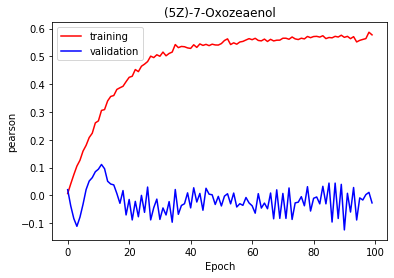

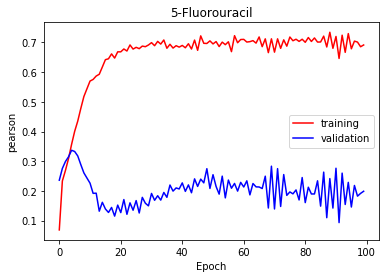

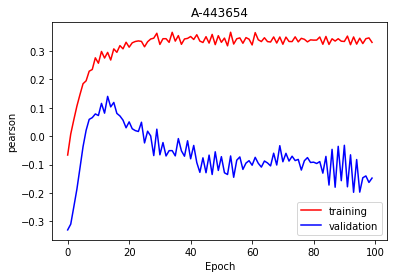

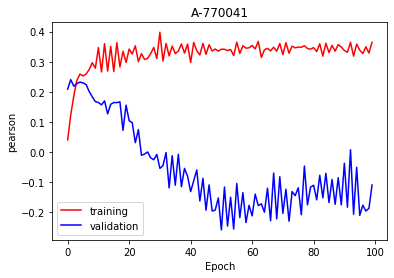

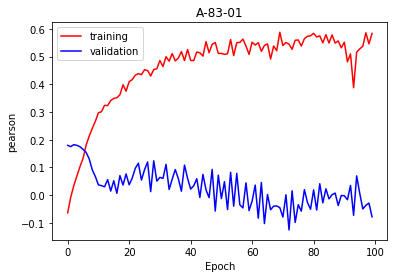

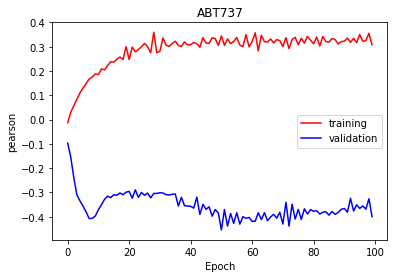

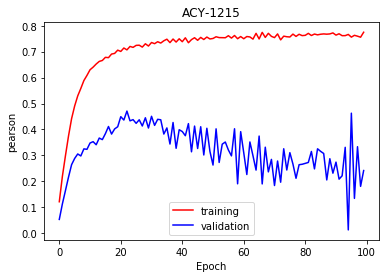

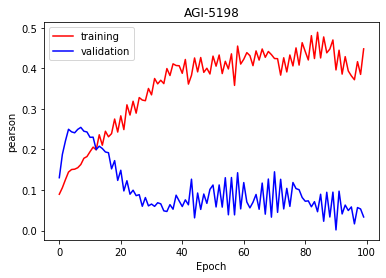

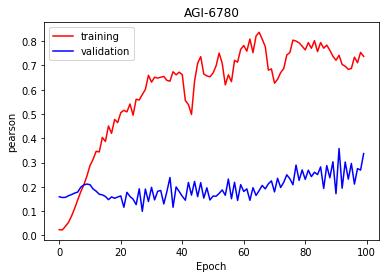

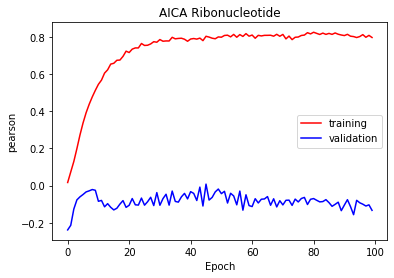

In [148]:
plot_learning_curve_from_history(training_history, validation_history, metric_name='pearson')

In [99]:
import matplotlib.pyplot as plt
def plot_learning_curve_from_history(train_loss_df, val_loss_df, drug, metric_name='mae'):
    plt.plot(train_loss_df[drug], color='r')
    plt.plot(val_loss_df[drug], color='b')
    plt.legend(['training', 'validation'])
    plt.xlabel('Epoch')
    plt.ylabel(metric_name)
    plt.title(drug)

In [ ]:
for 